# **Лабораторная работа №6** "Линейная регрессия" 
# **Выполнил: Дякин Владимир; группа: ПИН-б-о-22-1**

## Ссылка на используемый датасет: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## **Первичный анализ**

### Общее описание набора данных Pima Indians Diabetes Database

Этот набор данных содержит информацию о диабете у женщин коренных племен Пима, проживающих недалеко от Феникса, штат Аризона, США. В нем приведены различные медицинские показатели 768 пациенток в возрасте от 21 года.

### Описание признаков

1. **Беременность (Pregnancies)** - число беременностей 
2. **Глюкоза (Glucose)** - концентрация глюкозы в плазме крови после двухчасового теста на толерантность к глюкозе
3. **Кровяное давление (BloodPressure)** - диастолическое кровяное давление (мм рт.ст.)
4. **Толщина кожной складки (SkinThickness)** - толщина кожной складки на трицепсе (мм)
5. **Инсулин (Insulin)** - уровень инсулина в плазме крови через 2 часа (мU/мл)
6. **Индекс массы тела (BMI)** - индекс массы тела (вес в кг / (рост в м)^2)
7. **Родословная (DiabetesPedigreeFunction)** - функция родословной, оценивающая генетическую предрасположенность к диабету
8. **Возраст (Age)** - возраст пациентки (лет)
9. **Целевая переменная (Outcome)** - наличие диабета (0 = нет, 1 = да)

### Характеристики данных

- Количество элементов (Instances): 768
- Количество признаков (Features): 8 (включая целевую переменную)
- Связанные задачи: Бинарная классификация
- Характеристики набора данных: Многомерные (Multivariate)
- Тип признаков: Численные (Numeric)

### Распределение классов

Данный набор данных представляет собой задачу бинарной классификации, где целевая переменная "Outcome" принимает значения 0 (нет диабета) или 1 (да, диабет). Распределение классов следующее:
- Класс 0 (нет диабета): 500 экземпляров (65,1%)
- Класс 1 (диабет): 268 экземпляров (34,9%)

Следовательно, данные являются несбалансированными, так как количество экземпляров в классе "нет диабета" значительно превышает количество экземпляров в классе "диабет". Это может создавать дополнительные сложности при построении и оценке модели классификации.

Таким образом, набор данных Pima Indians Diabetes Database представляет интерес для разработки и оценки моделей бинарной классификации для прогнозирования наличия диабета у женщин коренных племен Пима на основе предоставленных медицинских показателей.

## Задание

Импорт необходимых библиотек для работы с данными (Pandas, NumPy), визуализацией (Matplotlib) и построением модели дерева решений (Scikit-learn).

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

Загрузка датасета Pima Indians Diabetes

In [38]:
data = pd.read_csv('diabetes.csv')

Разделение данных на признаки и целевую переменную

In [39]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

Разделение данных на обучающий и тестовый наборы

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Построение логического классификатора с заданными параметрами

In [41]:
max_depth = 3  # Максимальная глубина дерева
max_features = 4  # Максимальное количество признаков
clf = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=4, random_state=42)

Визуализация дерева решений

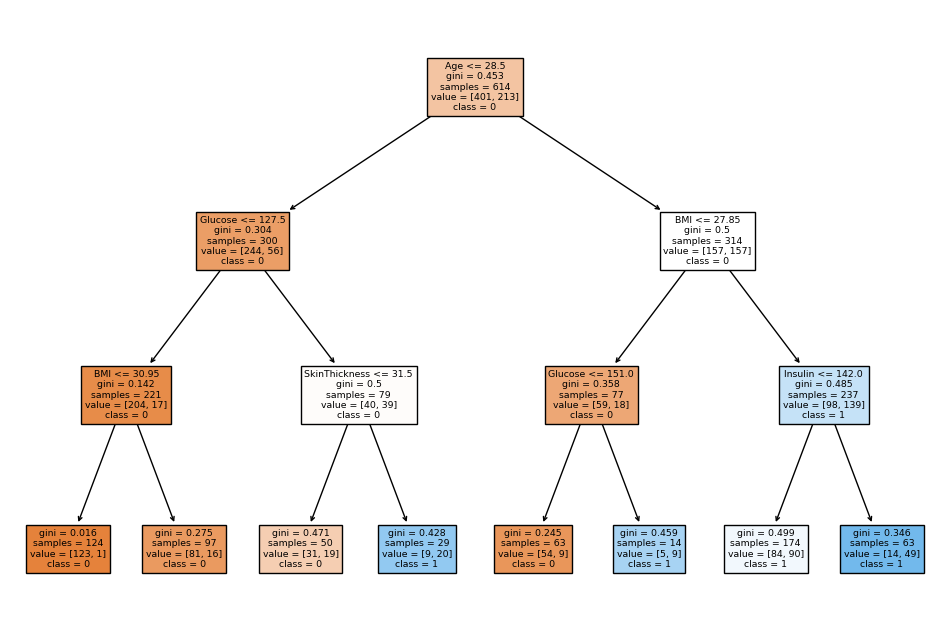

In [42]:
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.savefig('LR6_decision_tree_1.png')
plt.show()

Перебор различных значений максимальной глубины дерева решений, вычисление среднеквадратичной ошибки (MSE) на основе 5-кратной кросс-валидации и сохранение полученных значений MSE.

In [43]:
max_depth_values = range(1, 11)
mse_values = []

# Вычисление MSE для различных значений max_depth с помощью кросс-валидации
for depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    mse = -cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error').mean()
    mse_values.append(mse)

Построение графика зависимости MSE от max_depth

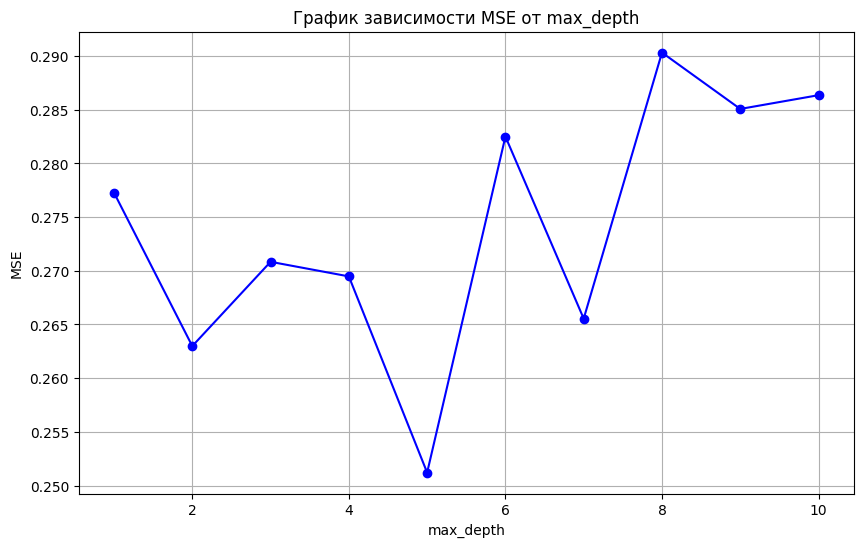

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mse_values, marker='o', color='b', linestyle='-')
plt.title('График зависимости MSE от max_depth')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

Перебор различных значений максимального количества признаков для дерева решений, вычисление среднеквадратичной ошибки (MSE) на основе 5-кратной кросс-валидации и сохранение полученных значений MSE.

In [45]:
# Список значений max_features, для которых мы хотим вычислить MSE
max_features_values = range(1, X.shape[1] + 1)
mse_values_features = []

# Вычисление MSE для различных значений max_features с помощью кросс-валидации
for features in max_features_values:
    clf = DecisionTreeClassifier(max_features=features, random_state=42)
    mse_features = -cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error').mean()
    mse_values_features.append(mse_features)

Построение графика зависимости MSE от max_features

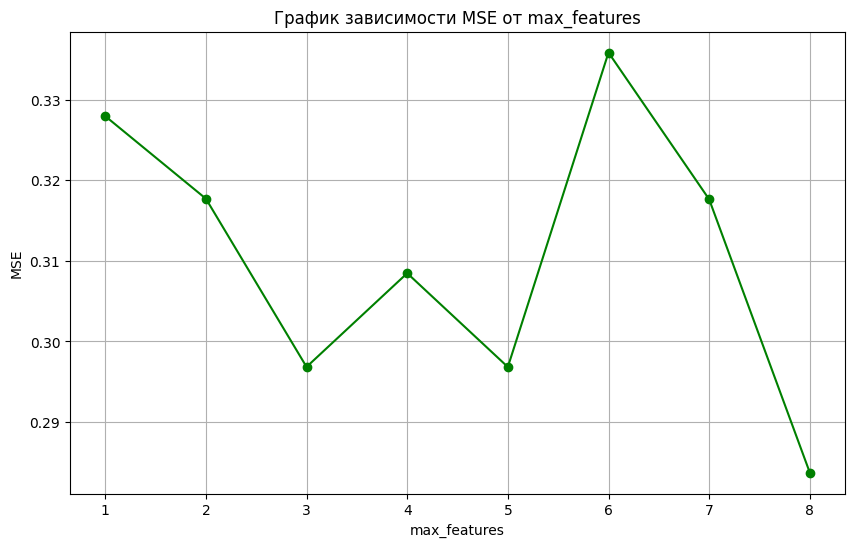

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(max_features_values, mse_values_features, marker='o', color='g', linestyle='-')
plt.title('График зависимости MSE от max_features')
plt.xlabel('max_features')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

Стандартизация данных X с помощью StandardScaler.

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Применение метода главных компонент (PCA) для уменьшения размерности

In [48]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

Определение оптимальных значений максимальной глубины и количества признаков для модели дерева решений на основании минимальных значений MSE, полученных в предыдущем шаге.

In [49]:
best_depth = max_depth_values[np.argmin(mse_values)]
best_features = max_features_values[np.argmin(mse_values_features)]

Обучение классификатора с оптимальными значениями максимальной глубины и количества признаков 

In [50]:
clf_optimal = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features, random_state=42)
clf_optimal.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=8, random_state=42)

Оценка точности классификатора и прогнозирование на тестовом наборе

In [51]:
y_pred = clf_optimal.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность классификатора с оптимальными значениями max_depth и max_features: {accuracy:.2f}")

Точность классификатора с оптимальными значениями max_depth и max_features: 0.79


Визуализация дерева решений

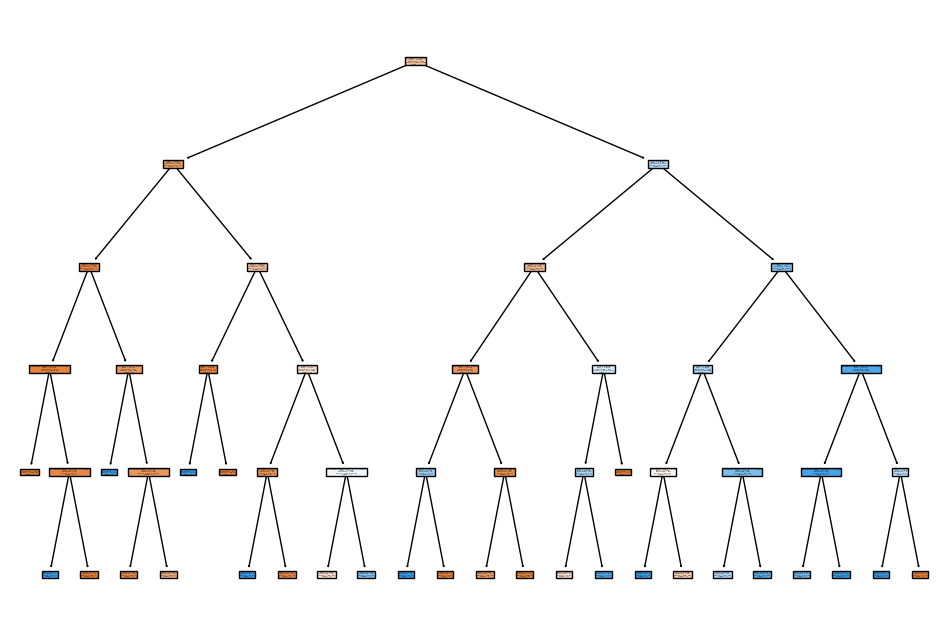

In [52]:
plt.figure(figsize=(12, 8))
plot_tree(clf_optimal, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.savefig('LR6_decision_tree_2.png')
plt.show()

## Контрольные вопросы

### **1. Какие методы классификации являются линейными?**

Линейные методы классификации основаны на предположении о линейной разделимости классов. Некоторые из основных линейных методов классификации включают в себя:
1. Линейная регрессия
2. Логистическая регрессия
3. Метод опорных векторов (SVM)
4. Линейный дискриминантный анализ (LDA)
5. Метод k-ближайших соседей (kNN) с линейной функцией расстояния

Эти методы стремятся найти линейные гиперплоскости в признаковом пространстве для разделения классов.

### **2. Укажите основные параметры линейной модели классификации.**

Основные параметры линейной модели классификации включают:
1. Веса (coefficients): Коэффициенты, определяющие вклад каждого признака в модель.
2. Перехват (intercept): Константа, добавляемая к итоговому предсказанию.
3. Функция потерь (loss function): Функция, оценивающая ошибку модели.
4. Регуляризация (regularization): Метод контроля сложности модели для предотвращения переобучения.
5. Скорость обучения (learning rate): Параметр, определяющий величину изменения весов на каждом шаге обучения.
6. Количество итераций (number of iterations): Количество проходов по данным в процессе обучения.
7. Тип оптимизатора (optimizer type): Алгоритм оптимизации для нахождения оптимальных весов модели.

Эти параметры играют ключевую роль в определении и настройке линейных моделей классификации.

### **3. Поясните назначение и принципы реализации методов стохастического градиента.**

Метод стохастического градиента (Stochastic Gradient Descent, SGD) является популярным алгоритмом оптимизации, который используется для обучения моделей машинного обучения, включая линейные модели классификации. 

Назначение метода стохастического градиента заключается в минимизации функции потерь путем корректировки параметров модели в направлении, противоположном градиенту функции потерь. Основной принцип работы метода состоит в том, что на каждом шаге обновления параметров модели используется только один случайно выбранный пример из обучающего набора данных. Это позволяет сократить время обучения и улучшить сходимость алгоритма.

Принципы реализации метода стохастического градиента включают следующие шаги:
1. Выбор случайного примера из обучающего набора.
2. Расчет градиента функции потерь по выбранному примеру.
3. Обновление параметров модели в направлении, противоположном градиенту, с учетом скорости обучения.
4. Повторение этих шагов для всех примеров в обучающем наборе или до сходимости.

Таким образом, метод стохастического градиента является эффективным и масштабируемым алгоритмом оптимизации, который широко применяется в обучении моделей машинного обучения.

### **4. В чем заключается главная идея метода опорных векторов?**

Главная идея метода опорных векторов (Support Vector Machines, SVM) заключается в поиске оптимальной гиперплоскости, которая разделяет классы данных таким образом, чтобы максимизировать зазор между классами. Этот метод используется в задачах классификации и регрессии.

Основные принципы метода опорных векторов:
1. Максимизация зазора: SVM стремится найти гиперплоскость, которая максимально удалена от ближайших точек каждого класса, образуя "зазор" между классами.
2. Использование опорных векторов: Опорные векторы - это точки данных, которые лежат на границе зазора или нарушают его. Они играют ключевую роль в определении гиперплоскости.
3. Ядровое преобразование: SVM может использовать ядровые функции для преобразования данных в более высокоразмерное пространство, где данные становятся линейно разделимыми.
4. Регуляризация: SVM может использовать регуляризацию для контроля сложности модели и предотвращения переобучения.

Таким образом, метод опорных векторов является мощным алгоритмом машинного обучения, который позволяет эффективно разделять данные различных классов с помощью оптимальной гиперплоскости.

### **5. Что такое «линейно разделимая выборка»?**

"Линейно разделимая выборка" - это термин, используемый в контексте задач классификации, чтобы описать выборку данных, которая может быть идеально разделена линейной гиперплоскостью на два класса. Другими словами, существует прямая (в двумерном случае) или гиперплоскость (в многомерном случае), которая может точно разделить объекты разных классов без ошибок.

Основные характеристики линейно разделимой выборки:

1. **Линейная разделимость:** Объекты разных классов можно идеально разделить линейной гиперплоскостью без ошибок классификации.

2. **Отсутствие перекрывающихся областей:** Объекты каждого класса находятся в отдельных областях пространства признаков, и нет перекрывающихся областей между классами.

3. **Простота классификации:** Из-за четкого разделения классов линейно разделимая выборка обеспечивает простоту классификации и высокую точность модели.

4. **Идеальная разделимость:** В идеальном случае линейно разделимая выборка позволяет модели безошибочно классифицировать объекты на основе их признаков.

Хотя понятие линейно разделимой выборки полезно для понимания основ классификации, в реальных задачах часто встречаются выборки, которые не являются линейно разделимыми. В таких случаях могут использоваться более сложные модели классификации, такие как ядерные методы опорных векторов (SVM) или нейронные сети, чтобы обработать нелинейные зависимости между признаками и целевой переменной.

### **6. Поясните назначение ядер и спрямляющих пространств в алгоритмах линейной классификации.**

Ядра (kernels) и спрямляющие пространства (feature spaces) играют важную роль в алгоритмах линейной классификации, таких как метод опорных векторов (SVM). Давайте разберемся в их назначении:

1. **Ядра (kernels)**:
   - Ядра в SVM позволяют осуществлять нелинейные преобразования данных, делая их линейно разделимыми в более высокоразмерном пространстве.
   - Они позволяют работать с данными, которые не могут быть эффективно разделены линейной гиперплоскостью в исходном пространстве признаков.
   - Различные типы ядер, такие как полиномиальное, RBF (радиально-базисная функция) и сигмоидное, могут быть использованы для преобразования данных.

2. **Спрямляющие пространства (feature spaces)**:
   - Спрямляющие пространства представляют собой новые пространства, в которых данные становятся линейно разделимыми после применения ядер.
   - Путем преобразования данных в более высокоразмерное спрямляющее пространство с помощью ядер, SVM может строить оптимальную гиперплоскость для разделения классов.
   - Это позволяет эффективно работать с нелинейными зависимостями между признаками и целевой переменной.

Таким образом, использование ядер и спрямляющих пространств в алгоритмах линейной классификации, таких как SVM, позволяет модели эффективно работать с нелинейными данными и повышать точность классификации.

## Вывод

В ходе работы, направленной на изучение принципов построения информационных систем с использованием линейных методов машинного обучения, были достигнуты следующие результаты:

- Освоена методология работы с моделями линейной регрессии в задачах машинного обучения.
- Изучены методы работы с линейными моделями в Python.
- Освоена методика применения методов регрессии.
- Изучены основные параметры регрессионных моделей.

Эти результаты позволят эффективно применять линейные методы машинного обучения при построении информационных систем и работе с данными.